In [66]:
from pathlib import Path  # Import Path for file system path operations and management
import numpy as np  # Import NumPy for numerical computations and array operations
import pandas as pd  # Import Pandas for data manipulation and analysis with DataFrames
import matplotlib.pyplot as plt  # Import Matplotlib for creating static, interactive visualizations
import seaborn as sns  # Import Seaborn for statistical data visualization built on Matplotlib

from sklearn.model_selection import  train_test_split # Import function to split dataset into training and testing subsets
from sklearn.metrics import * # Import function to calculate various metric

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [80]:
train_dir = 'Rock-Paper-Scissors/Rock-Paper-Scissors/train'
test_dir = 'Rock-Paper-Scissors/Rock-Paper-Scissors/test'
# validation_dir = 'Rock-Paper-Scissors/Rock-Paper-Scissors/validation'

### normalization, augmentation, train_test_split

In [89]:
train_generator = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    rotation_range=90,
    zoom_range = 0.2
)

test_generator = ImageDataGenerator(
    rescale = 1./255,
)

In [90]:
train_images = train_generator.flow_from_directory(
    train_dir,
    target_size=(150,150),
    color_mode = 'rgb',
    class_mode='categorical',
    batch_size=64,
    shuffle=True,
    seed=42
)
test_images = test_generator.flow_from_directory(
    test_dir,
    target_size=(150,150),
    color_mode = 'rgb',
    class_mode='categorical',
    batch_size=64,
    shuffle=True,
    seed=42,
    # subset='validation'
)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


train_test_split_0.2

In [ ]:
IMAGE_SIZE = (150, 150) # Standardize image dimensions
BATCH_SIZE = 64
VALIDATION_SPLIT = 0.2 # 20% of the data will be used for validation


# Train_data
train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=20, 
    horizontal_flip=True, 
    validation_split=VALIDATION_SPLIT 
)

# Load the training images from the directory
train_generator1 = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical', 
    subset='training', 
    seed=42
)



#  Test_data
test_datagen = ImageDataGenerator(
    rescale=1./255, # Normalize pixel values to [0, 1]
    validation_split=VALIDATION_SPLIT
)

# Load the training images from the directory
test_generator1 = test_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical', 
    subset='validation', 
    seed=42 
)

Found 2016 images belonging to 3 classes.
Found 504 images belonging to 3 classes.


image grid display 

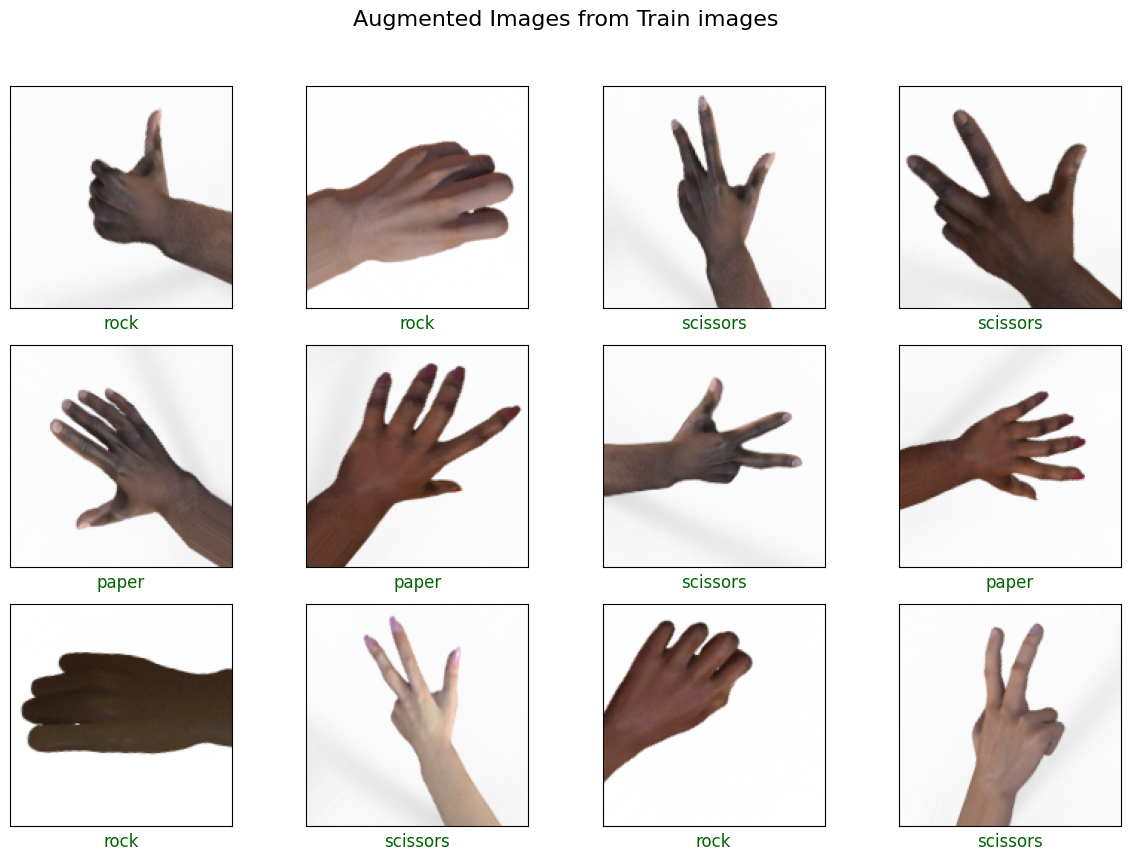

In [92]:
class_labels = train_images.class_indices
index_to_class = {v: k for k, v in class_labels.items()}

def fn_plot_images(generator, n_images=12):
    
    data, labels = next(generator)
    
    n_rows = 3
    n_cols = 4 
    
    plt.figure(figsize=(n_cols * 3, n_rows * 3)) 
    plt.suptitle("Augmented Images from Train images", fontsize=16)

    for i in range(n_images):
        if i >= len(data):
            print(f"\nWarning: Only {len(data)} images available in the batch.")
            break
            
        plt.subplot(n_rows, n_cols, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)

        image = data[i]
        one_hot_label = labels[i]
        
        class_index = np.argmax(one_hot_label)
        
        class_name = index_to_class[class_index]

        plt.imshow(image)
        plt.xlabel(class_name, fontsize=12, color='darkgreen')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
    plt.show()



fn_plot_images(train_images, n_images=12)

buuild model and compile (without reg)

In [93]:
inputs = tf.keras.Input(shape=(150, 150, 3))

x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(inputs)
x = tf.keras.layers.MaxPool2D()(x)

x = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPool2D()(x)

x = tf.keras.layers.Flatten()(x)

x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)

outputs = tf.keras.layers.Dense(3, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

model.compile(
    optimizer=optimizer,     # learning_rate=0.01
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


training and accuracy report 

In [94]:
history = model.fit(
    train_images,
    validation_data=test_images,
    epochs=5,
)


Epoch 1/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 34s 821ms/step - accuracy: 0.3349 - loss: 4.1013 - val_accuracy: 0.3333 - val_loss: 1.0988
Epoch 2/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 32s 801ms/step - accuracy: 0.3325 - loss: 1.0990 - val_accuracy: 0.3333 - val_loss: 1.0986
Epoch 3/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 32s 806ms/step - accuracy: 0.3190 - loss: 1.0993 - val_accuracy: 0.3333 - val_loss: 1.0987
Epoch 4/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 33s 811ms/step - accuracy: 0.3373 - loss: 1.0990 - val_accuracy: 0.3333 - val_loss: 1.0987
Epoch 5/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 33s 814ms/step - accuracy: 0.3119 - loss: 1.0990 - val_accuracy: 0.3333 - val_loss: 1.0986


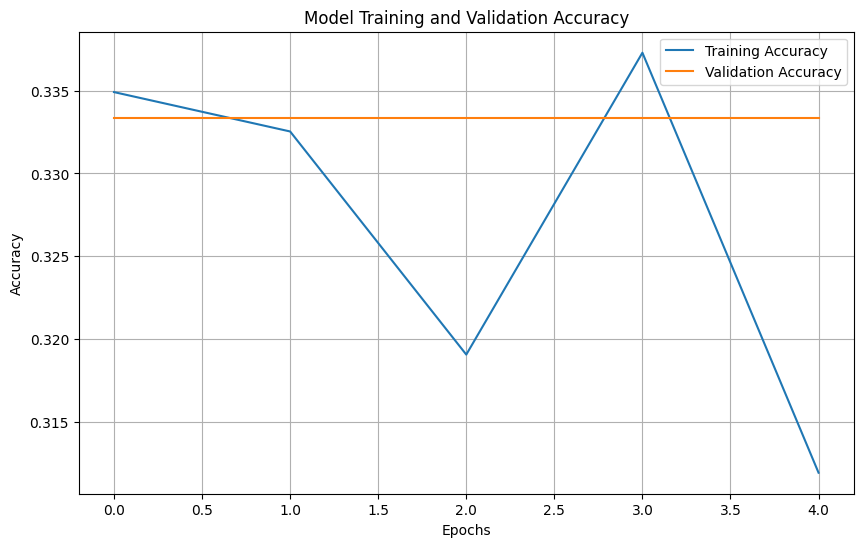

In [95]:
plt.figure(figsize=(10, 6))

plt.plot(history.history['accuracy'], label='Training Accuracy')

plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.title('Model Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()

plt.grid(True)
plt.show()

regularized and performance improvement model 

In [98]:


inputs = tf.keras.Input(shape=(150, 150, 3))

x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3))(inputs)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.ReLU()(x)
x = tf.keras.layers.MaxPool2D()(x)

x = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3))(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.ReLU()(x)
x = tf.keras.layers.MaxPool2D()(x)

x = tf.keras.layers.Flatten()(x)

x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)

outputs = tf.keras.layers.Dense(3, activation='softmax')(x)

model_reg = tf.keras.Model(inputs=inputs, outputs=outputs)

# optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model_reg.compile(
    optimizer='adam',  #learning_rate=0.001
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [100]:
history_reg = model_reg.fit(
    train_images,
    validation_data=test_images,
    epochs=5,
)


Epoch 1/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.4401 - loss: 6.7790 - val_accuracy: 0.3333 - val_loss: 1.0895
Epoch 2/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.6825 - loss: 0.7911 - val_accuracy: 0.3333 - val_loss: 1.1906
Epoch 3/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.7655 - loss: 0.6125 - val_accuracy: 0.3333 - val_loss: 1.4911
Epoch 4/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.8421 - loss: 0.4516 - val_accuracy: 0.3333 - val_loss: 1.9978
Epoch 5/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.8444 - loss: 0.4172 - val_accuracy: 0.3333 - val_loss: 2.0123


comparing model1 and model2 

In [ ]:
comp_df = pd.DataFrame({
    'Epochs': range(1, 6),
    'Training Accuracy Without Reg': history.history['accuracy'],
    'Validation Accuracy Without Reg': history.history['val_accuracy'], 
    'Training Accuracy With Reg': history_reg.history['accuracy'],
    'Validation Accuracy With Reg': history_reg.history['val_accuracy']
})
comp_df

Epochs  Training Accuracy Without Reg  Validation Accuracy Without Reg  \
0       1                       0.339683                         0.333333   
1       2                       0.328968                         0.333333   
2       3                       0.325794                         0.333333   
3       4                       0.330159                         0.333333   
4       5                       0.331746                         0.333333   

   Training Accuracy With Reg  Validation Accuracy With Reg  
0                    0.500397                      0.333333  
1                    0.715873                      0.333333  
2                    0.815873                      0.333333  
3                    0.869841                      0.333333  
4                    0.887698                      0.333333

final evaluation and error analysis 

In [101]:
y_pred_probs = model_reg.predict(test_images)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 276ms/step


In [88]:
print(classification_report(test_images.classes, y_pred_classes, target_names=test_images.class_indices.keys()))

              precision    recall  f1-score   support

       paper       0.00      0.00      0.00       124
        rock       0.33      1.00      0.50       124
    scissors       0.00      0.00      0.00       124

    accuracy                           0.33       372
   macro avg       0.11      0.33      0.17       372
weighted avg       0.11      0.33      0.17       372



c:\Users\dai\.conda\envs\tf_env\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\dai\.conda\envs\tf_env\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\dai\.conda\envs\tf_env\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [57]:
print(confusion_matrix(test_images.classes, y_pred_classes))

[[  0   0 124]
 [  0   0 124]
 [  0   0 124]]


10 misclassified samples

In [102]:
misclassified_indices = np.where(y_pred_classes != test_images.classes)[0]

num_to_display = min(10, len(misclassified_indices))

print(f"Total misclassified samples: {len(misclassified_indices)}")

Total misclassified samples: 248


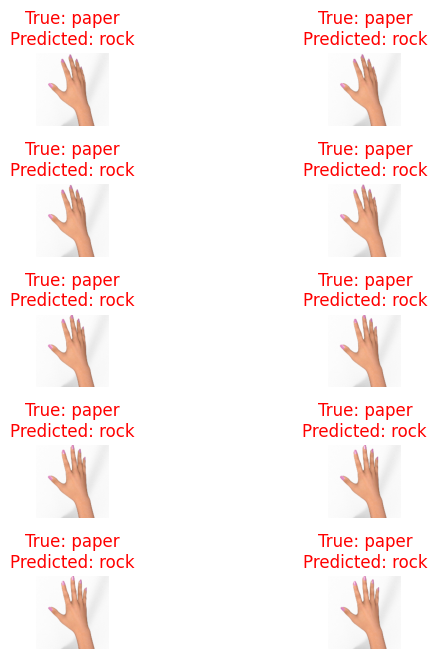

In [104]:
from tensorflow.keras.preprocessing import image

plt.figure(figsize=(6, 8))

for i, wrong_index in enumerate(misclassified_indices[:num_to_display]):
    file_path = test_images.filepaths[wrong_index]
    
    # Load the image
    img = image.load_img(file_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    
    true_label = list(test_images.class_indices.keys())[list(test_images.class_indices.values()).index(test_images.classes[wrong_index])]
    predicted_label = list(test_images.class_indices.keys())[list(test_images.class_indices.values()).index(y_pred_classes[wrong_index])]
    
    plt.subplot(num_to_display // 2 + 1, 2, i + 1)
    plt.imshow(img_array.astype('uint8')) # Use astype('uint8') for proper display
    
    title_text = f"True: {true_label}\nPredicted: {predicted_label}"
    plt.title(title_text, color='red')
    plt.axis('off')

plt.tight_layout()
plt.show()

### mini analysis
accuracy on training set has improved to 0.88 after applying batch normalization and reducing the learning rate. But validation accuracy has not improved 
